<a href="https://colab.research.google.com/github/NguyenDacCuong2604/ML/blob/main/Lab_10_20130215_NguyenDacCuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **neural networks**, **CNN** for classification tasks using Keras API. 

*   **Deadline: 23:59, 28/04/2023**



# Import libraries

In [1]:
# code
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#code
from keras import Sequential
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.layers import Dense, Flatten
import numpy as np
import tensorflow
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#Task 1. 
**1.1.** Apply Fully connected neural network to **MNIST** dataset using 
*  2 hidden layers (the first hidden layer has 250 neuron, the second one has 100 neurons) 
*  Compile the model using loss: 'categorical_crossentropy', 'optimizer': adam, and metrics='accuracy' 
*  Then, fit this model with 20 epoches and a batch size of 128. You can reduce the number of epoches to decreasing the running time
*  Evaluate the trained model using test set   


In [ ]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
numclass = len(np.unique(y_train))
X_train = X_train.astype("float") / 255
X_test = X_test.astype("float") / 255
y_train = tensorflow.keras.utils.to_categorical (y_train,numclass)
y_test = tensorflow.keras.utils.to_categorical (y_test,numclass)
n_train_samples = X_train.shape[0] // 2
X_train = X_train[:n_train_samples]
y_train = y_train[:n_train_samples]

# Get half of the test data
n_test_samples = X_test.shape[0] // 2
X_test = X_test[:n_test_samples]
y_test = y_test[:n_test_samples]
print(X_train.shape)
print(y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(30000, 28, 28)
(30000, 10)


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
235/235 [==============================] - 5s 13ms/step - loss: 0.3706 - accuracy: 0.8937
Epoch 2/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1450 - accuracy: 0.9577
Epoch 3/20
235/235 [==============================] - 4s 17ms/step - loss: 0.0938 - accuracy: 0.9720
Epoch 4/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0648 - accuracy: 0.9804
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0460 - accuracy: 0.9869
Epoch 6/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0319 - accuracy: 0.9910
Epoch 7/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0246 - accuracy: 0.9929
Epoch 8/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0184 - accuracy: 0.9950
Epoch 9/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0134 - accuracy: 0.9964
Epoch 10/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0109 - accuracy: 

In [ ]:
score = model.evaluate(X_test, y_test)
print(score)

157/157 [==============================] - 1s 3ms/step - loss: 0.1397 - accuracy: 0.9690
[0.13972163200378418, 0.968999981880188]


*   1.2. Apply GridSearchCV to find the best hyperparameters

```
optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32,64,128]
epochs = [15, 30, 60]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}
```



In [ ]:
#Create a python function that returns a compiled DNN model
def create_dnn_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(250, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model
#Use Keras wrapper to package the model as an sklearn object
model = KerasClassifier(build_fn=create_dnn_model)

In [ ]:
optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32,64,128]
epochs = [15, 30, 60]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}

In [ ]:
grid_model = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, refit=True)
#Train the model
grid_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/60
938/938 [==============================] - 6s 5ms/step - loss: 0.2839 - accuracy: 0.9156
Epoch 2/60
938/938 [==============================] - 6s 7ms/step - loss: 0.1152 - accuracy: 0.9651
Epoch 3/60
938/938 [==============================] - 5s 5ms/step - loss: 0.0723 - accuracy: 0.9774
Epoch 4/60
938/938 [==============================] - 6s 7ms/step - loss: 0.0506 - accuracy: 0.9841
Epoch 5/60
938/938 [==============================] - 5s 5ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 6/60
938/938 [==============================] - 6s 6ms/step - loss: 0.0293 - accuracy: 0.9901
Epoch 7/60
938/938 [==============================] - 6s 6ms/step - loss: 0.0250 - accuracy: 0.9914
Epoch 8/60
938/938 [==============================] - 5s 6ms/step - loss: 0.0213 - accuracy: 0.9930
Epoch 9/60
938/938 [==============================] - 6s 7ms/step - loss: 0.0203 - accuracy: 0.9931
Epoch 10/60
938/938 [==============================] - 5s 6ms/step - loss: 0.0140 - accuracy: 0.9954

GridSearchCV(estimator=KerasClassifier(build_fn=<function create_dnn_model at 0x7f35803e50d0>),
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128], 'epochs': [15, 30, 60],
                         'optimizer': ['Adam', 'SGD', 'RMSprop']})

In [ ]:
print('Best hyperparameters:', grid_model.best_params_)
print('Best mean cross-validation score: %.2f%%' % (grid_model.best_score_ * 100))

Best hyperparameters: {'batch_size': 32, 'epochs': 60, 'optimizer': 'SGD'}
Best mean cross-validation score: 97.74%


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=60, batch_size=32, verbose=1)

Epoch 1/60
938/938 [==============================] - 5s 5ms/step - loss: 0.8498 - accuracy: 0.7843
Epoch 2/60
938/938 [==============================] - 4s 4ms/step - loss: 0.3573 - accuracy: 0.9001
Epoch 3/60
938/938 [==============================] - 4s 4ms/step - loss: 0.2960 - accuracy: 0.9169
Epoch 4/60
938/938 [==============================] - 5s 5ms/step - loss: 0.2588 - accuracy: 0.9265
Epoch 5/60
938/938 [==============================] - 4s 4ms/step - loss: 0.2321 - accuracy: 0.9345
Epoch 6/60
938/938 [==============================] - 4s 5ms/step - loss: 0.2104 - accuracy: 0.9400
Epoch 7/60
938/938 [==============================] - 5s 5ms/step - loss: 0.1922 - accuracy: 0.9456
Epoch 8/60
938/938 [==============================] - 4s 4ms/step - loss: 0.1759 - accuracy: 0.9496
Epoch 9/60
938/938 [==============================] - 4s 4ms/step - loss: 0.1622 - accuracy: 0.9537
Epoch 10/60
938/938 [==============================] - 5s 6ms/step - loss: 0.1505 - accuracy: 0.9569

In [ ]:
#score
score = model.evaluate(X_test, y_test)
print(score)

157/157 [==============================] - 1s 2ms/step - loss: 0.1160 - accuracy: 0.9660
[0.11599051207304001, 0.9660000205039978]


#Task 2. With CIFAR-10 dataset: 
 The consists of **60000** colour images in **10 classes**, with **6000 images per class**. 
*   **Traing set: 50000 images**
*   **Test set: 10000 images**

The photos are in color with **red, green, and blue** components but are small, measuring **32 by 32 pixel squares**.

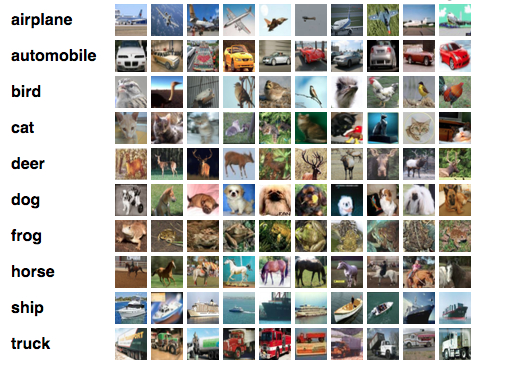

*  2.1. Apply **CNN** to **CIFAR-10** dataset with the following structure of network:

> 
1.   Convolutional input layer (**Conv2D**), 32 feature maps with a size of 3×3, a rectifier activation function, and a weight constraint of max norm set to 3
2.   **Dropout** set to 20%
3.   Convolutional layer (**Conv2D**), 32 feature maps with a size of 3×3, a rectifier activation function, and a weight constraint of max norm set to 3
4.   Max Pool layer with size 2×2 (**MaxPooling2D**)
5.   **Flatten** layer
6.   Fully connected layer (**Dense**) with 512 units and a rectifier activation function
7.   **Dropout** set to 50%
8.  Fully connected output layer (**Dense**) with 10 units and a softmax activation function 
9.  Compile the model using loss: 'categorical_crossentropy', 'optimizer': sgd, and metrics='accuracy' 
10.  Then, fit this model with 25 epoches and a batch size of 32. You can reduce the number of epoches to decreasing the running time
11. Evaluate the trained model using test set    

In [3]:
#import
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.constraints import max_norm

In [4]:
# code
# load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# one-hot encode target labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

n_train_samples = x_train.shape[0] // 4
x_train = x_train[:n_train_samples]
y_train = y_train[:n_train_samples]

# Get half of the test data
n_test_samples = x_test.shape[0] // 4
x_test = x_test[:n_test_samples]
y_test = y_test[:n_test_samples]
print(x_train.shape)
print(x_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
(12500, 32, 32, 3)
(2500, 32, 32, 3)


In [ ]:
model = Sequential()
#1.Convolutional input layer (Conv2D), 32 feature maps with a size of 3×3, a rectifier activation function, and a weight constraint of max norm set to 3
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_constraint=max_norm(3)))
#2.Dropout set to 20%
model.add(Dropout(0.2))
#3.Convolutional layer (Conv2D), 32 feature maps with a size of 3×3, a rectifier activation function, and a weight constraint of max norm set to 3
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
#4.Max Pool layer with size 2×2 (MaxPooling2D)
model.add(MaxPooling2D(pool_size=(2, 2)))
#5.Flatten layer
model.add(Flatten())
#6.Fully connected layer (Dense) with 512 units and a rectifier activation function
model.add(Dense(512, activation='relu'))
#7.Dropout set to 50%
model.add(Dropout(0.5))
#8.Fully connected output layer (Dense) with 10 units and a softmax activation function
model.add(Dense(10, activation='softmax'))

In [ ]:
#9. Compile the model using loss: 'categorical_crossentropy', 'optimizer': sgd, and metrics='accuracy'
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
#10.Then, fit this model with 25 epoches and a batch size of 32. You can reduce the number of epoches to decreasing the running time
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/25
1563/1563 [==============================] - 299s 190ms/step - loss: 1.6479 - accuracy: 0.4029 - val_loss: 1.3284 - val_accuracy: 0.5202
Epoch 2/25
1563/1563 [==============================] - 314s 201ms/step - loss: 1.2919 - accuracy: 0.5392 - val_loss: 1.1504 - val_accuracy: 0.5945
Epoch 3/25
1563/1563 [==============================] - 287s 184ms/step - loss: 1.1264 - accuracy: 0.5983 - val_loss: 1.0655 - val_accuracy: 0.6225
Epoch 4/25
1563/1563 [==============================] - 320s 204ms/step - loss: 1.0039 - accuracy: 0.6439 - val_loss: 1.0447 - val_accuracy: 0.6320
Epoch 5/25
1563/1563 [==============================] - 313s 200ms/step - loss: 0.8966 - accuracy: 0.6828 - val_loss: 0.9465 - val_accuracy: 0.6692
Epoch 6/25
1563/1563 [==============================] - 301s 193ms/step - loss: 0.8043 - accuracy: 0.7161 - val_loss: 0.9430 - val_accuracy: 0.6807
Epoch 7/25
1563/1563 [==============================] - 281s 180ms/step - loss: 0.7209 - accuracy: 0.7452 - val_

In [ ]:
#11.Evaluate the trained model using test set
score = model.evaluate(x_test, y_test)
print(score)

313/313 [==============================] - 12s 37ms/step - loss: 1.4694 - accuracy: 0.6897
[1.4694218635559082, 0.6897000074386597]



*   2.2. Apply GridSearchCV to find the best hyperparameters

```
optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32,64,128]
epochs = [15, 30, 60]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}
```

In [5]:
#create function model
# define the model architecture
def create_model(optimizer='sgd', batch_size=32, epochs=25):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_constraint=max_norm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    # compile the model
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam()
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop()
    else:
        opt = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
    
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit the model
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
    
    # evaluate the model on test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    return test_acc

In [6]:
# hyperparameters
optimizer = ['adam', 'sgd', 'rmsprop']
batch_size = [32, 64, 128]
epochs = [15, 30, 60]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}


In [7]:
#code
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

<ipython-input-7-1af2d830c9e1>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
#train
grid_result = grid.fit(x_train, y_train) 

In [ ]:
#print
print('Best hyperparameters:', grid_result.best_params_)
print('Best mean cross-validation score: %.2f%%' % (grid_result.best_score_ * 100))

#Task 3. 
**3.1.** Apply CNN to FASHION-MNIST dataset with your own structure of network.
*   Fashion-MNIST is a dataset of Zalando’s fashion article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. 

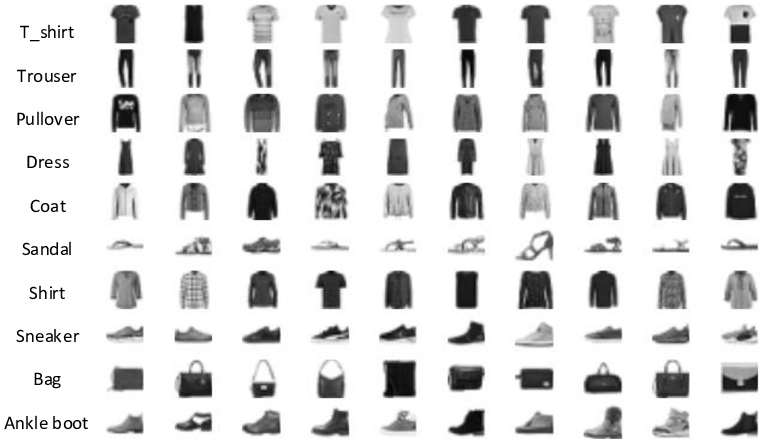
*   Each instance is a 28×28 grayscale image, associated with a label.
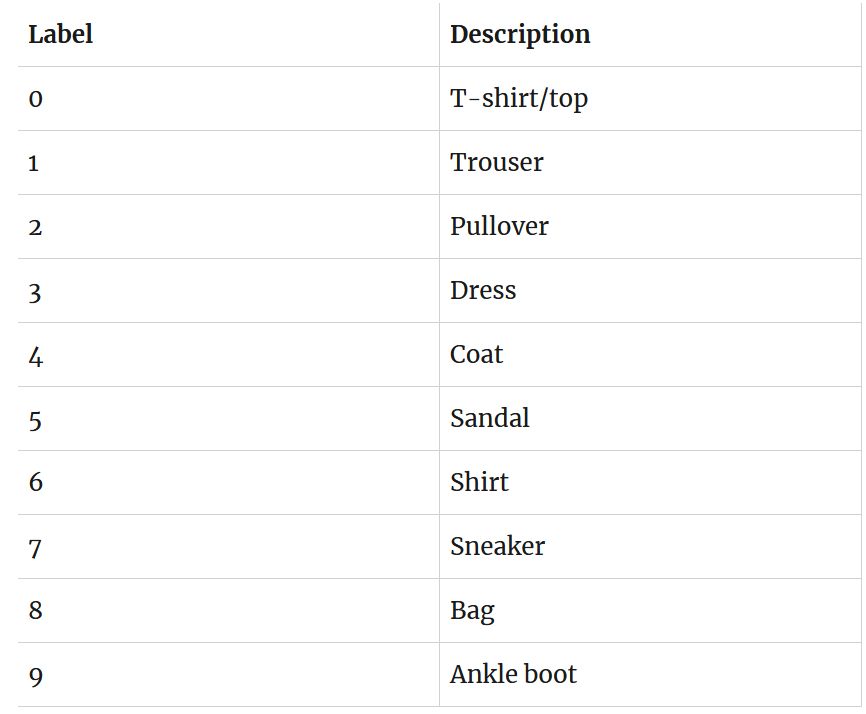

In [ ]:
#code
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
#fix data
# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
#model custom
model = Sequential([
    #1.Convolutional input layer (Conv2D), 32 feature maps with a size of 3×3, a rectifier activation function, and a weight constraint of max norm set to 3
    Conv2D(32, (3, 3), activation='relu', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.0)),
    #2.Dropout set to 20%
    Dropout(0.2),
    #3.Convolutional layer (Conv2D), 32 feature maps with a size of 3×3, a rectifier activation function, and a weight constraint of max norm set to 3
    Conv2D(32, (3, 3), activation='relu', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.0)),
    #4.Max Pool layer with size 2×2 (MaxPooling2D)
    MaxPooling2D(pool_size=(2, 2)),
    #5.Convolutional layer (Conv2D), 64 feature maps with a size of 3×3, a rectifier activation function, and a weight constraint of max norm set to 3
    Conv2D(64, (3, 3), activation='relu', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.0)),
    #6.Dropout set to 20%
    Dropout(0.2),
    #7.Convolutional layer (Conv2D), 64 feature maps with a size of 3×3, a rectifier activation function, and a weight constraint of max norm set to 3
    Conv2D(64, (3, 3), activation='relu', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.0)),
    #8.Max Pool layer with size 2×2 (MaxPooling2D)
    MaxPooling2D(pool_size=(2, 2)),
    #9.Flatten layer
    Flatten(),
    #10.Fully connected layer (Dense) with 512 units and a rectifier activation function
    Dense(512, activation='relu'),
    #11.Dropout set to 50%
    Dropout(0.5),
    #12.Fully connected output layer (Dense) with 10 units and a softmax activation function
    Dense(10, activation='softmax')
])

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32)

In [ ]:
#11.Evaluate the trained model using test set
score = model.evaluate(X_test, y_test)
print(score)

*   3.2. Apply GridSearchCV to find the best hyperparameters

```
optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32,64,128]
epochs = [15, 30, 60]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}
```


In [ ]:
#create function model
def create_model(optimizer='adam'):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.0)),
        Dropout(0.2),
        Conv2D(32, (3, 3), activation='relu', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.0)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.0)),
        Dropout(0.2),
        Conv2D(64, (3, 3), activation='relu', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.0)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
     # compile the model
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam()
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop()
    else:
        opt = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
    
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
# hyperparameters
optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32, 64, 128]
epochs = [15, 30, 60]
param_grid = {"optimizer": optimizer, "batch_size": batch_size, "epochs": epochs}

In [ ]:
# Create GridSearchCV
grid = GridSearchCV(estimator=create_model(), param_grid=param_grid, cv=3)

In [ ]:
#train
grid_result = grid.fit(X_train, y_train)

In [ ]:
#print test
print('Best hyperparameters:', grid_result.best_params_)
print('Best mean cross-validation score: %.2f%%' % (grid_result.best_score_ * 100))

#Finally,
Save a copy in your Github. Remember renaming the notebook.